In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

**Data preparation**

In [61]:
def generate_data(num_samples, min_val=0, max_val=100):
    """
    Generate pairs of integers and their sums.
    """
    x_data = []
    y_data = []
    for _ in range(num_samples):
        a = random.randint(min_val, max_val)
        b = random.randint(min_val, max_val)
        x_data.append([a, b])
        y_data.append(a + b)
    return x_data, y_data

**Preprocessing**

In [62]:
def preprocess_data(x_data, y_data):
    """
    Normalize inputs and convert to PyTorch tensors.
    """
    x_tensor = torch.tensor(x_data, dtype=torch.float32)
    y_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)
    return x_tensor, y_tensor

# Generate and preprocess data
x_data, y_data = generate_data(1000)
x_train, y_train = preprocess_data(x_data, y_data)

**Model Definition**

In [63]:
class addnet(nn.Module):
    """
    Neural network to learn integer addition.
    """
    def __init__(self, input_size, hidden_size, output_size):
        super(addnet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [64]:
input_size = 2  # a & b to take their sum
hidden_size = 32
output_size = 1  # predicted value for a+b

**Loss Function**

In [65]:
criterion = nn.MSELoss()

**Training & evaluation functions**

In [66]:
# Training and Plotting Function
def train_and_plot(model_class, x_train, y_train, criterion, lrs , epochs=1000):
    """
    Train the model with multiple learning rates, plot loss curves, and return the best model.
    """
    results = {}
    best_loss = float('inf')
    best_model = None
    best_lr = None

    plt.figure(figsize=(10, 6))
    for lr in lrs:
        print(f"\nTraining with Learning Rate: {lr}")
        model = model_class(input_size=2, hidden_size=32, output_size=1)
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Track loss
        losses = []
        for epoch in range(epochs):
            predictions = model(x_train)
            loss = criterion(predictions, y_train)
            losses.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if loss.item() < best_loss:
                best_loss = loss.item()
                best_model = model
                best_lr = lr

        results[lr] = losses
        plt.plot(range(1, epochs + 1), losses, label=f"LR={lr}")

    # Plot all loss curves
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss for Different Learning Rates")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"\nBest Learning Rate: {best_lr}, Best Final Loss: {best_loss:.4f}")
    return best_model

# Evaluation and Plotting Function
def evaluate_best_model(model, num_samples=10, min_val=0, max_val=100):
    """
    Evaluate the best model and visualize predictions vs true values.
    """
    model.eval()
    x_test, y_test = generate_data(num_samples, min_val, max_val)
    x_test_tensor, y_test_tensor = preprocess_data(x_test, y_test)

    with torch.no_grad():
        predictions = model(x_test_tensor)

    # Scatter plot: predictions vs true values
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test_tensor.numpy(), predictions.numpy(), color="blue", label="Predictions")
    plt.plot([min_val, 2 * max_val], [min_val, 2 * max_val], color="red", linestyle="--", label="Ideal")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Predictions vs True Values")
    plt.legend()
    plt.grid()
    plt.show()


Training with Learning Rate: 0.001

Training with Learning Rate: 0.01

Training with Learning Rate: 0.1

Training with Learning Rate: 1


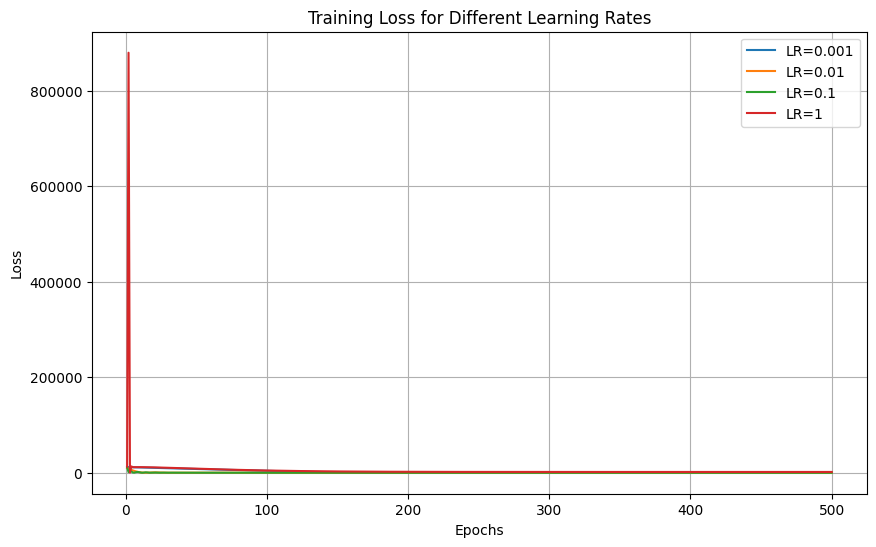


Best Learning Rate: 0.1, Best Final Loss: 0.0057


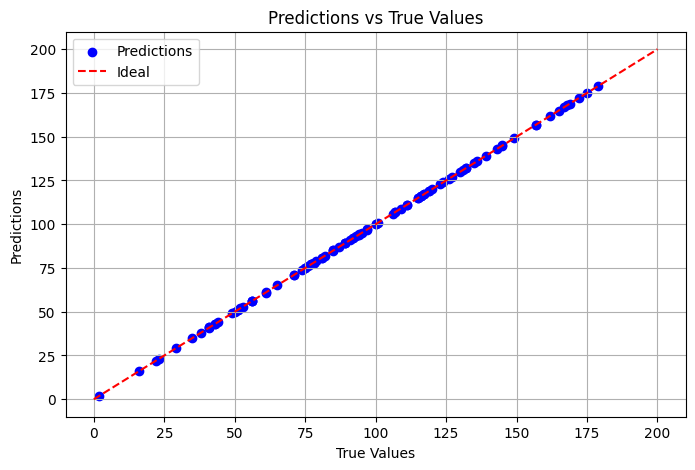

In [67]:
# Data Preparation
x_data, y_data = generate_data(1000)
x_train, y_train = preprocess_data(x_data, y_data)

# Training
learning_rates = [0.001, 0.01, 0.1,1]
best_model = train_and_plot(addnet, x_train, y_train,criterion=criterion, lrs=learning_rates, epochs=500)

# Evaluation
evaluate_best_model(best_model, num_samples=100)